In [1]:
%matplotlib inline

In [2]:
def _sigmoid(x, x0, k, ymin, ymax):
    height_diff = ymax - ymin
    return ymin + height_diff / (1 + np.exp(-k * (x - x0)))


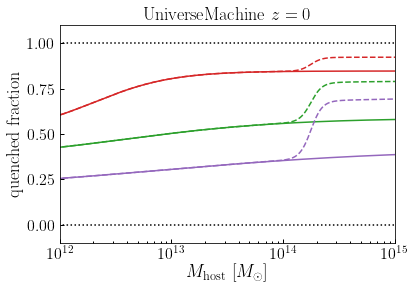

In [3]:
from hod_um_approx import quenched_fraction_centrals, quenched_fraction_satellites

lgmarr = np.linspace(5, 20, 10000)

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(1e12, 1e15)
ylim = ax.set_ylim(-0.1, 1.1)
xscale = ax.set_xscale('log')

__=ax.plot(10**lgmarr, quenched_fraction_satellites(11, lgmarr), 
           label=r'$\log M_{\star}\approx11$', color=mred)
__=ax.plot(10**lgmarr, quenched_fraction_satellites(10, lgmarr), 
           label=r'$\log M_{\star}\approx10$', color=mgreen)
__=ax.plot(10**lgmarr, quenched_fraction_satellites(9, lgmarr), 
           label=r'$\log M_{\star}\approx9$', color=mpurple)

x0, k, ymin = 14.25, 20, 0
y0 = quenched_fraction_satellites(11, lgmarr)
y = _sigmoid(lgmarr, x0, k, ymin, (1 - y0)/2) + y0
__=ax.plot(10**lgmarr, y, '--', color=mred)

y0 = quenched_fraction_satellites(10, lgmarr)
y = _sigmoid(lgmarr, x0, k, ymin, (1 - y0)/2) + y0
__=ax.plot(10**lgmarr, y, '--', color=mgreen)

y0 = quenched_fraction_satellites(9, lgmarr)
y = _sigmoid(lgmarr, x0, k, ymin, (1 - y0)/2) + y0
__=ax.plot(10**lgmarr, y, '--', color=mpurple)


xlabel = ax.set_xlabel(r'$M_{\rm host}\ [M_{\odot}]$')
ylabel = ax.set_ylabel(r'${\rm quenched\ fraction}$')
title = ax.set_title(r'${\rm UniverseMachine}\ z=0$')

__=ax.plot(np.logspace(10, 20, 1000), np.ones(1000), ':', color='k')
__=ax.plot(np.logspace(10, 20, 1000), np.zeros(1000), ':', color='k')

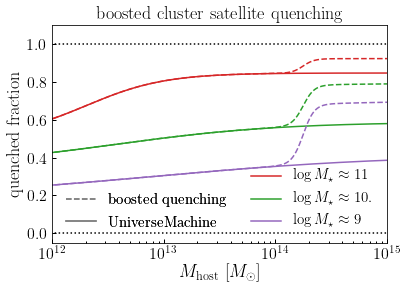

In [4]:
from hod_um_approx import quenched_fraction_satellites
from hod_um_approx import cluster_boosted_quenched_fraction_satellites
lgmarr = np.linspace(5, 20, 10000)

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(1e12, 1e15)
ylim = ax.set_ylim(-0.05, 1.1)
xscale = ax.set_xscale('log')

__=ax.plot(10**lgmarr, quenched_fraction_satellites(11, lgmarr), 
           label=r'$\log M_{\star}\approx11$', color=mred)
__=ax.plot(10**lgmarr, quenched_fraction_satellites(10, lgmarr), 
           label=r'$\log M_{\star}\approx10$', color=mgreen)
__=ax.plot(10**lgmarr, quenched_fraction_satellites(9, lgmarr), 
           label=r'$\log M_{\star}\approx9$', color=mpurple)

__=ax.plot(10**lgmarr, cluster_boosted_quenched_fraction_satellites(11, lgmarr), 
           '--', color=mred)
__=ax.plot(10**lgmarr, cluster_boosted_quenched_fraction_satellites(10, lgmarr), 
           '--', color=mgreen)
__=ax.plot(10**lgmarr, cluster_boosted_quenched_fraction_satellites(9, lgmarr), 
           '--', color=mpurple)

xlabel = ax.set_xlabel(r'$M_{\rm host}\ [M_{\odot}]$')
ylabel = ax.set_ylabel(r'${\rm quenched\ fraction}$')
title = ax.set_title(r'${\rm boosted\ cluster\ satellite\ quenching}$')

__=ax.plot(np.logspace(10, 20, 1000), np.ones(1000), ':', color='k')
__=ax.plot(np.logspace(10, 20, 1000), np.zeros(1000), ':', color='k')

from matplotlib import lines as mlines
solid_red = mlines.Line2D([], [], ls='-', c=mred, label=r'$\log M_{\star}\approx11$')
solid_green = mlines.Line2D([], [], ls='-', c=mgreen, label=r'$\log M_{\star}\approx10.$')
solid_purple = mlines.Line2D([], [], ls='-', c=mpurple, label=r'$\log M_{\star}\approx9$')
h1 = [solid_red, solid_green, solid_purple]
first_legend = plt.legend(handles=h1, loc='lower right')
__ = plt.gca().add_artist(first_legend)

solid_gray = mlines.Line2D([], [], ls='-', c='gray', label=r'${\rm UniverseMachine}$')
dashed_gray = mlines.Line2D([], [], ls='--', c='gray', label=r'${\rm boosted\ quenching}$')
h3 = [dashed_gray, solid_gray]
second_legend = plt.legend(handles=h3, loc='lower left')
__ = plt.gca().add_artist(second_legend)

fig.savefig('FIGS/umachine_cluster_satellite_quenching_boost.png',
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)